In [50]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

In [3]:
dataset_train = pd.read_csv("trainset.csv")
dataset_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500
1,2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500
2,2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800
3,2013-01-07,365.348755,367.301056,362.929504,365.001007,365.001007,3332900
4,2013-01-08,365.393463,365.771027,359.874359,364.280701,364.280701,3373900


In [14]:
dataset_train.iloc[:,1:2]

,Open
0,357.385559
1,360.122742
2,362.313507
3,365.348755
4,365.393463
...,...
1254,1061.109985
1255,1058.069946
1256,1057.390015
1257,1051.599976


In [13]:
trainset = dataset_train.iloc[:,1:2].values

In [15]:
trainset

array([[ 357.385559],
       [ 360.122742],
       [ 362.313507],
       ...,
       [1057.390015],
       [1051.599976],
       [1046.719971]])

In [16]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_scaled = sc.fit_transform(trainset)

In [18]:
print(training_scaled.mean())
print(training_scaled.std())

0.41736496889461866
0.24210385307044796


In [19]:
x_train = []
y_train = []

In [26]:
for i in range(60,1259):
    x_train.append(training_scaled[i-60:i, 0])
    y_train.append(training_scaled[i,0])
x_train,y_train = np.array(x_train),np.array(y_train)

In [28]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [31]:
x_train.shape

(1199, 60, 1)

In [32]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [33]:
regressor = Sequential()
regressor.add(LSTM(units = 50,return_sequences = True,input_shape = (x_train.shape[1],1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

In [34]:
regressor.compile(optimizer = 'adam',loss = 'mean_squared_error')

In [35]:
regressor.fit(x_train,y_train,epochs = 100, batch_size = 32)

Epoch 1/100
1199/1199 [==============================] - 7s 6ms/step - loss: 0.0356
Epoch 2/100
1199/1199 [==============================] - 3s 2ms/step - loss: 0.0049
Epoch 3/100
1199/1199 [==============================] - 3s 2ms/step - loss: 0.0043
Epoch 4/100
1199/1199 [==============================] - 3s 2ms/step - loss: 0.0039
Epoch 5/100
1199/1199 [==============================] - 3s 2ms/step - loss: 0.0045
Epoch 6/100
1199/1199 [==============================] - 3s 2ms/step - loss: 0.0036
Epoch 7/100
1199/1199 [==============================] - 3s 2ms/step - loss: 0.0038
Epoch 8/100
1199/1199 [==============================] - 3s 2ms/step - loss: 0.0034
Epoch 9/100
1199/1199 [==============================] - 3s 2ms/step - loss: 0.0031
Epoch 10/100
1199/1199 [==============================] - 3s 2ms/step - loss: 0.0033
Epoch 11/100
1199/1199 [==============================] - 3s 2ms/step - loss: 0.0033
Epoch 12/100
1199/1199 [==============================] - 3s 2ms/step - lo

1199/1199 [==============================] - 3s 2ms/step - loss: 0.0010
Epoch 98/100
1199/1199 [==============================] - 3s 2ms/step - loss: 0.0011
Epoch 99/100
1199/1199 [==============================] - 3s 2ms/step - loss: 9.2079e-04
Epoch 100/100
1199/1199 [==============================] - 3s 2ms/step - loss: 9.9436e-04


In [36]:
dataset_test =pd.read_csv("testset.csv")

In [37]:
real_stock_price = dataset_test.iloc[:,1:2].values

In [38]:
dataset_test

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,1048.339966,1066.939941,1045.229980,1065.000000,1065.000000,1237600
1,2018-01-03,1064.310059,1086.290039,1063.209961,1082.479980,1082.479980,1430200
2,2018-01-04,1088.000000,1093.569946,1084.001953,1086.400024,1086.400024,1004600
3,2018-01-05,1094.000000,1104.250000,1092.000000,1102.229980,1102.229980,1279100
4,2018-01-08,1102.229980,1111.270020,1101.619995,1106.939941,1106.939941,1047600
...,...,...,...,...,...,...,...
120,2018-06-25,1143.599976,1143.910034,1112.780029,1124.810059,1124.810059,2157300
121,2018-06-26,1128.000000,1133.209961,1116.659058,1118.459961,1118.459961,1563200
122,2018-06-27,1121.339966,1131.836060,1103.619995,1103.979980,1103.979980,1293900
123,2018-06-28,1102.089966,1122.310059,1096.010010,1114.219971,1114.219971,1072400


In [39]:
dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']),axis = 0)
dataset_total

0       357.385559
1       360.122742
2       362.313507
3       365.348755
4       365.393463
          ...     
120    1143.599976
121    1128.000000
122    1121.339966
123    1102.089966
124    1120.000000
Name: Open, Length: 1384, dtype: float64

In [40]:
inputs = dataset_total[len(dataset_total) - len(dataset_test)-60:].values
inputs

array([ 955.48999 ,  966.700012,  980.      ,  980.      ,  973.719971,
        987.450012,  992.      ,  992.099976,  990.289978,  991.77002 ,
        986.      ,  989.440002,  989.52002 ,  970.      ,  968.369995,
        980.      , 1009.190002, 1014.      , 1015.219971, 1017.210022,
       1021.76001 , 1022.109985, 1028.98999 , 1027.27002 , 1030.52002 ,
       1033.98999 , 1026.459961, 1023.419983, 1022.590027, 1019.210022,
       1022.52002 , 1034.01001 , 1020.26001 , 1023.309998, 1035.      ,
       1035.869995, 1040.      , 1055.089966, 1042.680054, 1022.369995,
       1015.799988, 1012.659973,  995.940002, 1001.5     , 1020.429993,
       1037.48999 , 1035.5     , 1039.630005, 1046.119995, 1045.      ,
       1054.609985, 1066.079956, 1075.199951, 1071.780029, 1064.949951,
       1061.109985, 1058.069946, 1057.390015, 1051.599976, 1046.719971,
       1048.339966, 1064.310059, 1088.      , 1094.      , 1102.22998 ,
       1109.400024, 1097.099976, 1106.300049, 1102.410034, 1132.

In [41]:
inputs = inputs.reshape(-1,1)

In [42]:
inputs

array([[ 955.48999 ],
       [ 966.700012],
       [ 980.      ],
       [ 980.      ],
       [ 973.719971],
       [ 987.450012],
       [ 992.      ],
       [ 992.099976],
       [ 990.289978],
       [ 991.77002 ],
       [ 986.      ],
       [ 989.440002],
       [ 989.52002 ],
       [ 970.      ],
       [ 968.369995],
       [ 980.      ],
       [1009.190002],
       [1014.      ],
       [1015.219971],
       [1017.210022],
       [1021.76001 ],
       [1022.109985],
       [1028.98999 ],
       [1027.27002 ],
       [1030.52002 ],
       [1033.98999 ],
       [1026.459961],
       [1023.419983],
       [1022.590027],
       [1019.210022],
       [1022.52002 ],
       [1034.01001 ],
       [1020.26001 ],
       [1023.309998],
       [1035.      ],
       [1035.869995],
       [1040.      ],
       [1055.089966],
       [1042.680054],
       [1022.369995],
       [1015.799988],
       [1012.659973],
       [ 995.940002],
       [1001.5     ],
       [1020.429993],
       [10

In [43]:
inputs = sc.transform(inputs)
inputs.shape

(185, 1)

In [44]:
x_test = []
for i in range(60,185):
    x_test.append(inputs[i-60:i,0])

In [45]:
x_test = np.array(x_test)
x_test.shape

(125, 60)

In [46]:
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
x_test.shape

(125, 60, 1)

In [47]:
predicted_price = regressor.predict(x_test)

In [48]:
predicted_price = sc.inverse_transform(predicted_price)
predicted_price

array([[1055.7664],
       [1054.5361],
       [1057.3792],
       [1066.7861],
       [1078.7852],
       [1089.6492],
       [1097.6785],
       [1099.5353],
       [1099.0142],
       [1097.6724],
       [1102.6296],
       [1110.054 ],
       [1117.3054],
       [1122.3853],
       [1125.9882],
       [1132.5602],
       [1143.3278],
       [1152.8075],
       [1158.8116],
       [1161.6305],
       [1160.8654],
       [1159.3901],
       [1157.3849],
       [1148.456 ],
       [1131.7848],
       [1104.0769],
       [1086.74  ],
       [1079.0383],
       [1071.0123],
       [1067.8007],
       [1068.0079],
       [1069.6927],
       [1076.1869],
       [1085.3175],
       [1092.7881],
       [1099.1588],
       [1105.0096],
       [1108.4141],
       [1112.261 ],
       [1118.6467],
       [1121.8188],
       [1118.8774],
       [1103.206 ],
       [1088.0776],
       [1084.4972],
       [1088.5105],
       [1099.481 ],
       [1114.8096],
       [1132.8472],
       [1147.935 ],


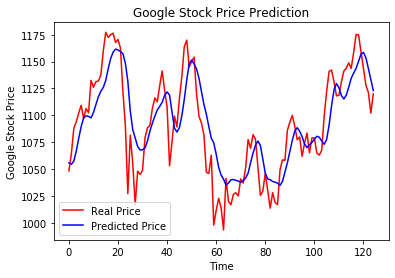

In [49]:
plt.plot(real_stock_price,color = 'red', label = 'Real Price')
plt.plot(predicted_price, color = 'blue', label = 'Predicted Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [199]:
# Some functions to help out with
def plot_predictions(test,predicted):
    plt.figure(figsize=(10,7))
    plt.plot(test, color='red',label='Real IBM Stock Price')
    plt.plot(predicted, color='blue',label='Predicted IBM Stock Price')
    plt.title('IBM Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('IBM Stock Price')
    plt.legend()
    plt.show()

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

In [155]:
# First, we get the data
dataset = pd.read_csv('IBM_2006-01-01_to_2020-03-06.csv', index_col='Date', parse_dates=['Date'])
dataset.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
1989-01-03,30.46875,30.56250,30.15625,30.25000,5776000,IBM
1989-01-04,30.37500,30.65625,30.31250,30.62500,5089600,IBM
1989-01-05,30.62500,30.78125,30.50000,30.56250,5778400,IBM
1989-01-06,30.62500,30.68750,30.34375,30.46875,5104000,IBM
1989-01-09,30.40625,30.59375,30.37500,30.50000,4604400,IBM


In [156]:
dataset.dtypes

Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
Name       object
dtype: object

In [157]:
dataset.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
Name      0
dtype: int64

In [173]:
# Checking for missing values
training_set = dataset[:'2016'].iloc[:,1:2].values
test_set = dataset['2017':].iloc[:,1:2].values

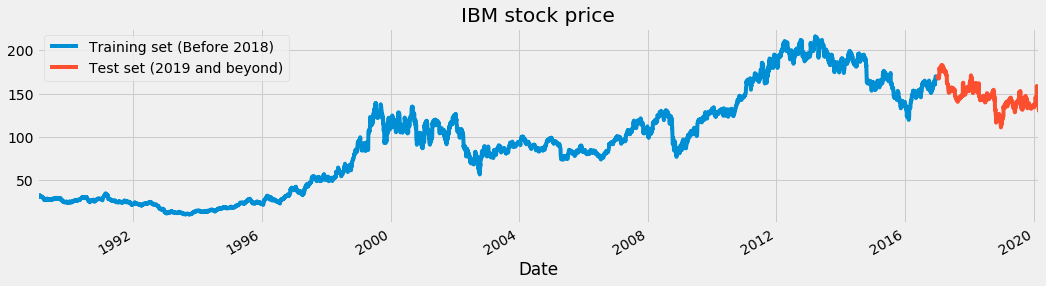

In [174]:
# We have chosen 'High' attribute for prices. Let's see what it looks like
dataset["High"][:'2016'].plot(figsize=(16,4),legend=True)
dataset["High"]['2017':].plot(figsize=(16,4),legend=True)
plt.legend(['Training set (Before 2016)','Test set (2017 and beyond)'])
plt.title('IBM stock price')
plt.show()

In [175]:
# Scaling the training set
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [176]:
training_set.shape

(7057, 1)

In [177]:
training_set[60-60:60,0]

array([30.5625 , 30.65625, 30.78125, 30.6875 , 30.59375, 30.625  ,
       30.5625 , 31.03125, 30.9375 , 31.28125, 31.125  , 31.25   ,
       31.34375, 31.09375, 31.03125, 31.15625, 31.09375, 31.75   ,
       31.96875, 32.3125 , 32.71875, 32.71875, 32.46875, 32.21875,
       31.96875, 32.15625, 32.09375, 31.875  , 31.65625, 31.5625 ,
       31.6875 , 31.78125, 31.71875, 31.65625, 31.5    , 31.375  ,
       30.90625, 30.875  , 30.46875, 30.5625 , 30.59375, 30.21875,
       30.25   , 30.40625, 30.28125, 30.15625, 29.96875, 29.625  ,
       29.90625, 29.84375, 29.6875 , 29.6875 , 29.125  , 27.84375,
       27.625  , 27.34375, 27.5625 , 27.59375, 27.71875, 27.59375])

In [180]:
# Since LSTMs store long term memory state, we create a data structure with 60 timesteps and 1 output
# So for each element of training set, we have 60 previous training set elements 
X_train=[]
y_train=[]
for i in range(60,7057):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train,y_train=np.array(X_train),np.array(y_train)

In [181]:
# Reshaping X_train for efficient modelling
print(X_train.shape)
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
print(X_train.shape)

(6997, 60)
(6997, 60, 1)


# Create the Network

In [182]:
print((X_train.shape[1],1))

(60, 1)


In [183]:
# The LSTM architecture
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Fourth LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
# The output layer
regressor.add(Dense(units=1))
# Compiling the RNN
regressor.compile(optimizer='rmsprop',loss='mean_squared_error')
# Fitting to the training set
regressor.fit(X_train,y_train,epochs=75,batch_size=32)

Epoch 1/75
6997/6997 [==============================] - 17s 2ms/step - loss: 0.0110
Epoch 2/75
6997/6997 [==============================] - 15s 2ms/step - loss: 0.0046
Epoch 3/75
6997/6997 [==============================] - 15s 2ms/step - loss: 0.0035
Epoch 4/75
6997/6997 [==============================] - 15s 2ms/step - loss: 0.0029
Epoch 5/75
6997/6997 [==============================] - 15s 2ms/step - loss: 0.0024
Epoch 6/75
6997/6997 [==============================] - 15s 2ms/step - loss: 0.0023
Epoch 7/75
6997/6997 [==============================] - 15s 2ms/step - loss: 0.0021
Epoch 8/75
6997/6997 [==============================] - 15s 2ms/step - loss: 0.0019
Epoch 9/75
6997/6997 [==============================] - 16s 2ms/step - loss: 0.0018
Epoch 10/75
6997/6997 [==============================] - 16s 2ms/step - loss: 0.0017
Epoch 11/75
6997/6997 [==============================] - 16s 2ms/step - loss: 0.0016
Epoch 12/75
6997/6997 [==============================] - 17s 2ms/step - lo

In [187]:
# Now to get the test set ready in a similar way as the training set.
# The following has been done so first 60 entires of test set have 60 previous values which is impossible to get unless we take the whole 
# 'High' attribute data for processing
dataset_total = pd.concat((dataset["High"][:'2016'],dataset["High"]['2017':]),axis=0)
#dataset_total=dataset["High"]['2008':]
inputs = dataset_total[len(dataset_total)-len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

In [189]:
inputs.shape

(859, 1)

In [190]:
# Preparing X_test and predicting the prices
X_test = []
for i in range(60,859):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

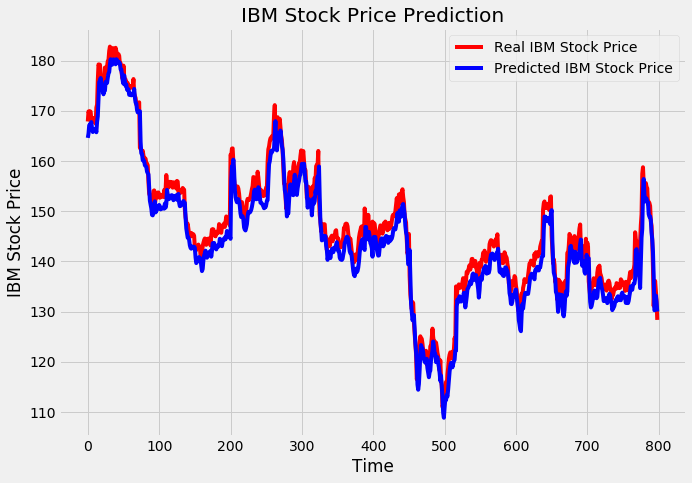

In [200]:
# Visualizing the results for LSTM
plot_predictions(test_set,predicted_stock_price)

In [192]:
# Evaluating our model
return_rmse(test_set,predicted_stock_price)

The root mean squared error is 3.0456159650801613.
